In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from RNG import random

#generate 1000 random numbers uniformly distributed between 0 and 1, both with numpy and with RNG
N=1000
#numpy random
np.random.seed(0)
rand = np.random.uniform(0,1,N)

#RNG random
rng = random(0)
myrand = rng.uniform (size=N)


# Uniform distribution in (0,1)

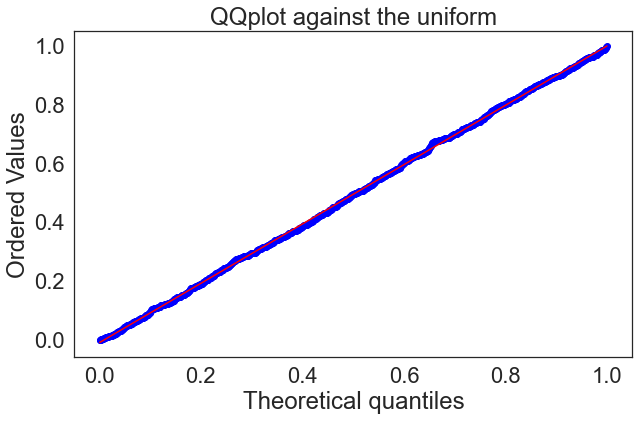

In [98]:
# QQplot against the uniform distribution in (0, 1), showing a perfect match.
sns.set_theme(style='white',palette='Dark2',font_scale=2)

import pylab 
import scipy.stats as stats
fig,ax=plt.subplots( figsize=(10,6))
stats.probplot(myrand, dist="uniform", plot=pylab)
ax.set_title('QQplot against the uniform')
fig.savefig('results/QQplot.pdf', bbox_inches='tight')

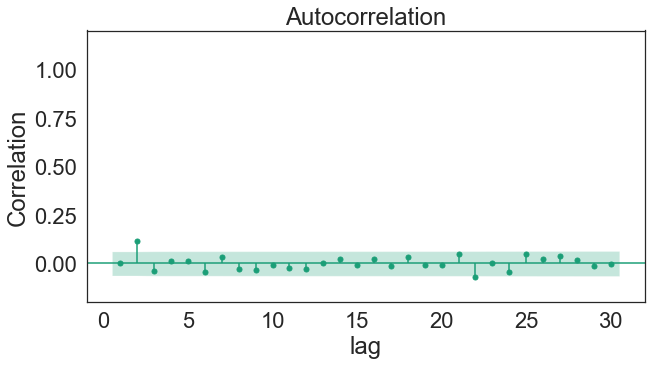

In [99]:
#auto correlation plot

fig,ax=plt.subplots(figsize=(10,5))
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(rand, lags=30, ax=ax,zero=False)
ax.set_xlabel("lag")
ax.set_ylabel("Correlation")
ax.set_ylim(-0.2,1.2)
fig.savefig('results/autocorrelation.pdf', bbox_inches='tight')


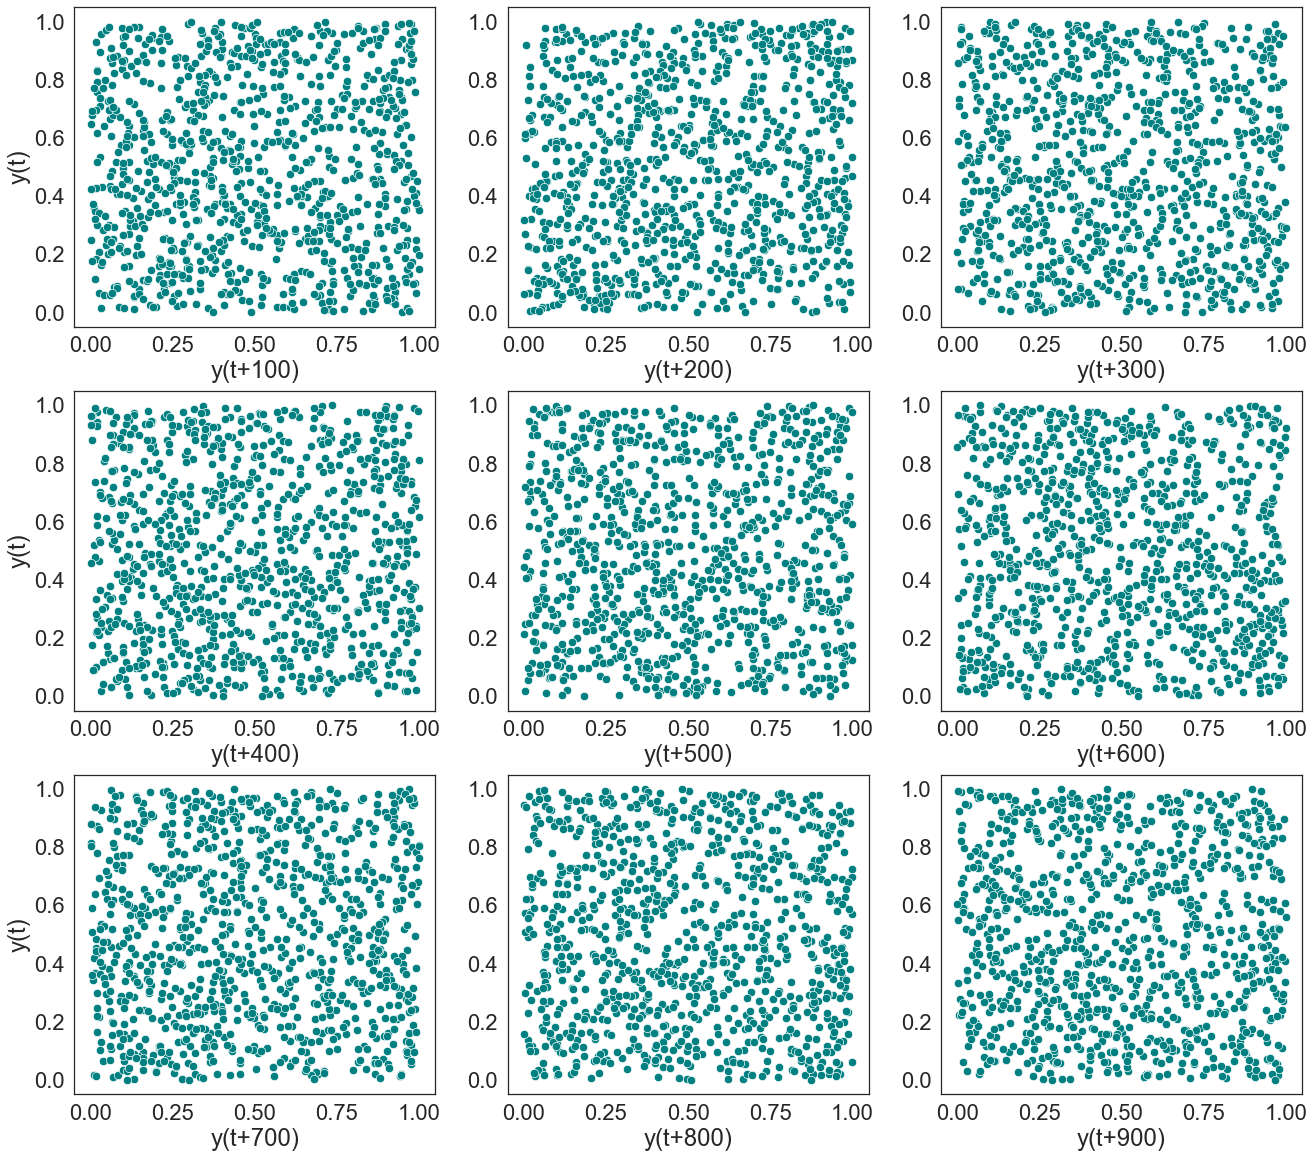

In [100]:
# lag plot of the random numbers

df = pd.DataFrame(np.zeros((len(rand),10)), columns=['rand',*['lag_{}'.format(i) for i in range(100,1000, 100)]])
df.loc[:, 'rand'] = rand
for i in range(1,10):
    df.loc[:, 'lag_{}'.format(i)] = df['rand'].shift(periods=i)
df = df.dropna()
df.index = np.arange(len(df))

fig,ax=plt.subplots(3,3,figsize=(22,20))
sns.set_theme(style='white',palette='Dark2',font_scale=2)

for i in range(9):
    sns.scatterplot(y='rand', x='lag_{}'.format(i+1), data=df, ax=ax[i//3,i%3], color='teal', s=70)
    ax[i//3,i%3].set_xlabel("y(t+{}00)".format(i+1))
    if i%3==0:
        ax[i//3,i%3].set_ylabel("y(t)")
    else: ax[i//3,i%3].set_ylabel("")
fig.savefig('results/lag_plots.pdf', bbox_inches='tight')


# show periodicity in RNG 

In [101]:
def widespread (inf=0, sup=1, nit=1, size=1, a=16807 , m=2**31-1, seed=1):
    def widespread (inf, sup, a, m, n):
        
        # print(a**n*seed)
        # print(n)
        from decimal import Decimal
        import decimal

        decimal.getcontext().prec=10000
        rand = (Decimal(a**n)*Decimal(seed))%Decimal(m)/Decimal(m)
        return rand

    size = int(size)
    nit = 0
    rand = np.zeros(size)
    for i in range(size):
        rand[i] = inf + (sup-inf)*widespread(inf,sup,a,m,nit)
        nit+=1
    return rand

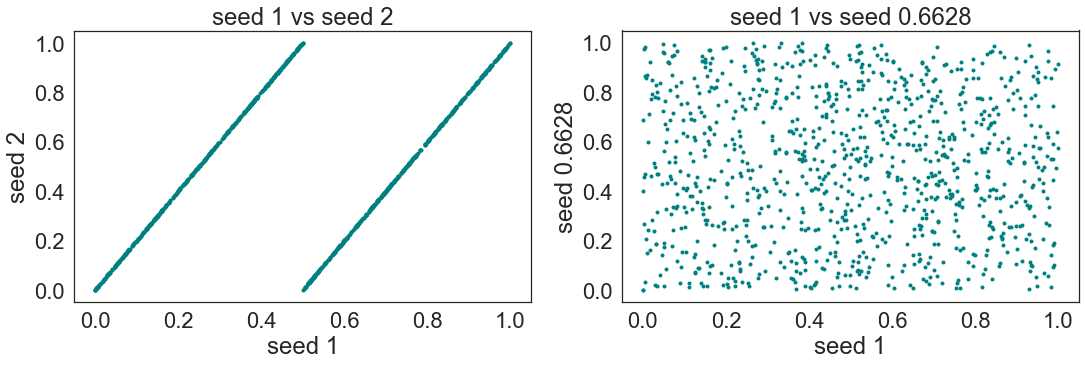

In [102]:
N=1000

seed1 = widespread(size=N, seed=1)
seed2 = widespread(size=N, seed=2)
seedn = widespread(size=N, seed=seed1[-1])

fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.lineplot(x=seed1, y=seed2, color='teal', ax=ax[0], lw=0, marker='o', markersize=4, markeredgewidth=0)
sns.lineplot(x=seed1, y=seedn, color='teal', ax=ax[1], lw=0, marker='o', markersize=4, markeredgewidth=0)
ax[0].set_title("seed 1 vs seed 2")
ax[1].set_title("seed 1 vs seed 0.6628")
ax[0].set_xlabel("seed 1")
ax[1].set_xlabel("seed 1")
ax[0].set_ylabel("seed 2")
ax[1].set_ylabel("seed 0.6628")
fig.savefig('results/seed_comparison.pdf', bbox_inches='tight')

# accept reject

In [103]:
def sinc2 (x): 
    return (np.sin(x)/x)**2

def diff(x,y):
    return np.abs(x-y)

def distr1dim(func, N, inf, sup):
    np.random.seed(1)
    def sample(inf, sup):
        bound_f_n = 1
        y = np.random.uniform(inf,sup)
        u = np.random.uniform(0,bound_f_n)
        while u>func(y):
            y = np.random.uniform(inf,sup)
            u = np.random.uniform(0,bound_f_n)
        return y
    rand = [sample(inf, sup) for _ in range(N)]
    return rand

def distr2dim(func, N, xinf, xsup, yinf, ysup):
    np.random.seed(1)
    def sample(xinf, xsup, yinf, ysup):
        bound_f_n = 1
        y = np.random.uniform(yinf,ysup)
        x = np.random.uniform(xinf,xsup)
        u = np.random.uniform(0,bound_f_n)
        while u>func(x,y):
            y = np.random.uniform(yinf,ysup)
            x = np.random.uniform(xinf,xsup)
            u = np.random.uniform(0,bound_f_n)
        return (x,y)
    rand = [sample(xinf, xsup, yinf, ysup) for _ in range(N)]
    return rand


In [104]:
N = 2000
randsinc = distr1dim(sinc2, N, -10, 10)
randdiff = np.array(distr2dim(diff, N, 0, 1, 0, 1))
xrand=randdiff[:,0]
yrand=randdiff[:,1]

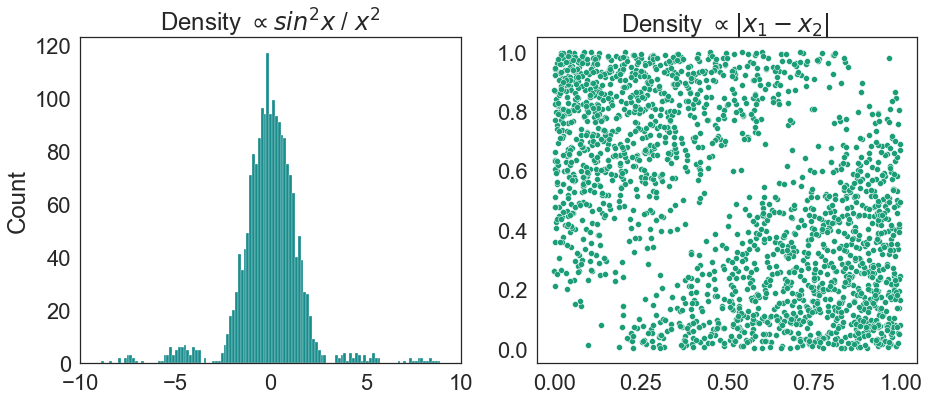

In [106]:

fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.histplot(randsinc, bins=100, color='teal', alpha=0.9, binwidth=0.15, ax=ax[0])
ax[0].set_xlim(-10,10)
sns.scatterplot(x=xrand, y=yrand)
ax[0].set_title(r"Density $\propto {sin^2x}$ / ${x^2}$")
ax[1].set_title(r"Density $\propto |x_1-x_2|$ ")
fig.savefig('results/AR.pdf', bbox_inches='tight')